<a href="https://colab.research.google.com/github/Drorkalel/Python_DataScience/blob/main/Analisis_de_Datos_TarjetaCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando Base de Datos

In [1]:
import pandas as pd
datos=pd.read_csv('/content/drive/MyDrive/PYTHON DATASCIENCE/Seaborn/1779-Data-Visualization-Explorando-con-Seaborn-aula1/1779-Data-Visualization-Explorando-con-Seaborn-aula1/credit_card.csv', sep=",")
datos.head(10)

,LIMIT_BAL,CHECKING_ACCOUNT,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,DEFAULT
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0
5,30110,Yes,2.University,Single,23,114.4180,114.4180,0
6,42154,Yes,1.High School,Married,28,4244.3056,1002.3619,0
7,60220,Yes,1.High School,Single,34,2946.8657,694.3366,0
8,78286,Yes,3.Graduate School,Single,51,6524.8370,6524.8370,0
9,189693,Yes,2.University,Single,41,1957.1500,301.1000,0


In [2]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LIMIT_BAL         1500 non-null   int64  
 1   CHECKING_ACCOUNT  1500 non-null   object 
 2   EDUCATION         1500 non-null   object 
 3   MARRIAGE          1500 non-null   object 
 4   AGE               1500 non-null   int64  
 5   BILL_AMT          1500 non-null   float64
 6   PAY_AMT           1500 non-null   float64
 7   DEFAULT           1500 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 93.9+ KB


In [3]:
datos.describe()

,LIMIT_BAL,AGE,BILL_AMT,PAY_AMT,DEFAULT
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51221.943333,35.212667,15459.869900,1984.869266,0.078000
std,39424.407462,9.274955,20722.582831,5296.771686,0.268261
min,3011.000000,21.000000,27.701200,0.000000,0.000000
25%,18066.000000,28.000000,2035.586550,407.011925,0.000000
50%,42154.000000,33.500000,7701.385250,759.374200,0.000000
75%,72264.000000,41.000000,20671.568850,1705.279850,0.000000
max,210770.000000,75.000000,141792.506500,97022.850800,1.000000


## Taduccion de variables

In [4]:
datos.columns

Index(['LIMIT_BAL', 'CHECKING_ACCOUNT', 'EDUCATION', 'MARRIAGE', 'AGE',
       'BILL_AMT', 'PAY_AMT', 'DEFAULT'],
      dtype='object')

In [5]:
dic_columnas={
   'LIMIT_BAL':'limite',
   'CHECKING_ACCOUNT': 'cuenta_corriente',
   'EDUCATION':'escolaridad',
   'MARRIAGE':'estado_civil',
   'AGE':'edad',
   'BILL_AMT':'valor_factura',
   'PAY_AMT':'valor_pago',
   'DEFAULT':'moroso'
}
dic_columnas

{'LIMIT_BAL': 'limite',
 'CHECKING_ACCOUNT': 'cuenta_corriente',
 'EDUCATION': 'escolaridad',
 'MARRIAGE': 'estado_civil',
 'AGE': 'edad',
 'BILL_AMT': 'valor_factura',
 'PAY_AMT': 'valor_pago',
 'DEFAULT': 'moroso'}

In [6]:
tarjetas=datos.rename(columns=dic_columnas) #Se cambia el nombre de las columnas
tarjetas.head(10)

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0
5,30110,Yes,2.University,Single,23,114.4180,114.4180,0
6,42154,Yes,1.High School,Married,28,4244.3056,1002.3619,0
7,60220,Yes,1.High School,Single,34,2946.8657,694.3366,0
8,78286,Yes,3.Graduate School,Single,51,6524.8370,6524.8370,0
9,189693,Yes,2.University,Single,41,1957.1500,301.1000,0


In [7]:
tarjetas.cuenta_corriente.unique()  # muestra los valores de esa columna

array(['Yes', 'No'], dtype=object)

In [8]:
dic_cuenta={
   'Yes':'si',
   'No':'no'
}
dic_cuenta

{'Yes': 'si', 'No': 'no'}

In [9]:
tarjetas.cuenta_corriente.map(dic_cuenta) # Cambiamos los valores de columna al español

0       si
1       si
2       si
3       si
4       no
        ..
1495    si
1496    no
1497    no
1498    no
1499    no
Name: cuenta_corriente, Length: 1500, dtype: object

In [10]:
tarjetas.cuenta_corriente = tarjetas.cuenta_corriente.map(dic_cuenta) # Cambiar variables ne columna

In [11]:
tarjetas.head(10)

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,si,2.University,Married,24,934.0122,0.0000,1
1,36132,si,2.University,Single,26,519.3975,0.0000,1
2,27099,si,2.University,Single,34,4223.5297,457.0698,0
3,15055,si,2.University,Married,37,14522.9563,602.2000,0
4,150550,no,3.Graduate School,Single,29,124060.1253,16560.5000,0
5,30110,si,2.University,Single,23,114.4180,114.4180,0
6,42154,si,1.High School,Married,28,4244.3056,1002.3619,0
7,60220,si,1.High School,Single,34,2946.8657,694.3366,0
8,78286,si,3.Graduate School,Single,51,6524.8370,6524.8370,0
9,189693,si,2.University,Single,41,1957.1500,301.1000,0


In [12]:
tarjetas.escolaridad.unique()

array(['2.University', '3.Graduate School', '1.High School'], dtype=object)

In [13]:
dic_escolaridad={
    '2.University':'2.universidad',
    '3.Graduate School':'3.post_grado',
    '1.High School':'1.colegio'
}
dic_escolaridad

{'2.University': '2.universidad',
 '3.Graduate School': '3.post_grado',
 '1.High School': '1.colegio'}

In [14]:
tarjetas.escolaridad = tarjetas.escolaridad.map(dic_escolaridad)

In [15]:
tarjetas.estado_civil.unique()

array(['Married', 'Single'], dtype=object)

In [16]:
dic_estado_civil={
   'Married':'Casado',
   'Single':'Soltero'
}
dic_estado_civil

{'Married': 'Casado', 'Single': 'Soltero'}

In [17]:
tarjetas.estado_civil=tarjetas.estado_civil.map(dic_estado_civil)

In [18]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,si,2.universidad,Casado,24,934.0122,0.0000,1
1,36132,si,2.universidad,Soltero,26,519.3975,0.0000,1
2,27099,si,2.universidad,Soltero,34,4223.5297,457.0698,0
3,15055,si,2.universidad,Casado,37,14522.9563,602.2000,0
4,150550,no,3.post_grado,Soltero,29,124060.1253,16560.5000,0


In [19]:
!pip install seaborn  # Verificamos si esta instalado seaborn en collab

## Importando Seaborn

In [20]:
import seaborn as sns

In [21]:
!pip show seaborn # Muestra la version de seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno


In [22]:
tarjetas.shape  # MUestra como estada conformado nuestro dataframe (filas;columnas)

(1500, 8)

In [23]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,si,2.universidad,Casado,24,934.0122,0.0000,1
1,36132,si,2.universidad,Soltero,26,519.3975,0.0000,1
2,27099,si,2.universidad,Soltero,34,4223.5297,457.0698,0
3,15055,si,2.universidad,Casado,37,14522.9563,602.2000,0
4,150550,no,3.post_grado,Soltero,29,124060.1253,16560.5000,0


<ipython-input-24-c84ce6169819>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tarjetas['limite'])


<Axes: xlabel='limite', ylabel='Density'>

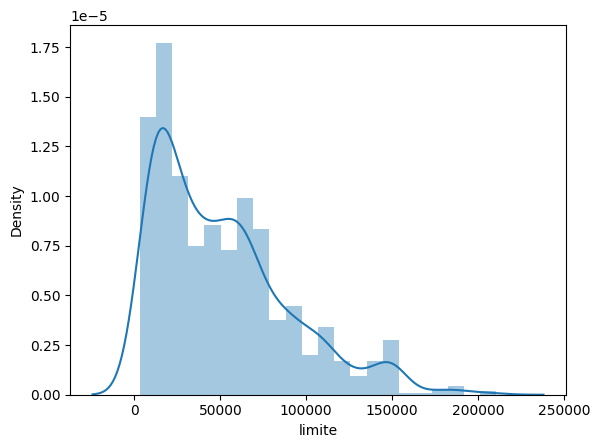

In [24]:
sns.distplot(tarjetas['limite'])

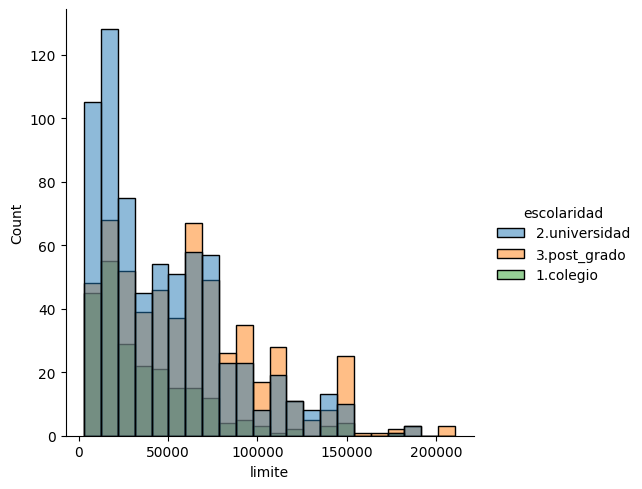

In [25]:
sns.displot(data=tarjetas, x='limite', hue='escolaridad');

## Analisis 2

In [26]:
tarjetas['iu']=tarjetas['valor_factura']/tarjetas['limite']
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,si,2.universidad,Casado,24,934.0122,0.0000,1,0.155100
1,36132,si,2.universidad,Soltero,26,519.3975,0.0000,1,0.014375
2,27099,si,2.universidad,Soltero,34,4223.5297,457.0698,0,0.155856
3,15055,si,2.universidad,Casado,37,14522.9563,602.2000,0,0.964660
4,150550,no,3.post_grado,Soltero,29,124060.1253,16560.5000,0,0.824046


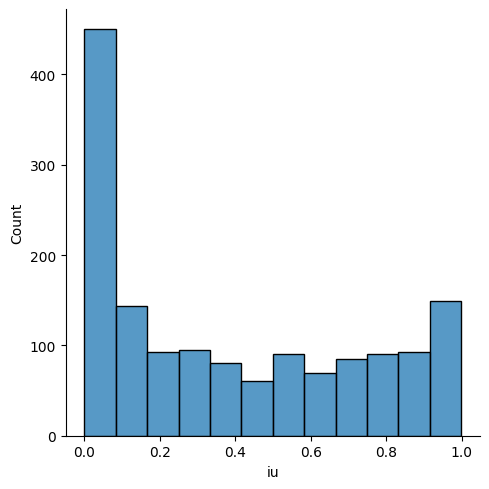

In [27]:
sns.displot(data=tarjetas, x='iu');

Hay un publico sigificativo que usa poco el limite que tienen disponible

# Estilos y Colores

In [28]:
sns.set_style('darkgrid')

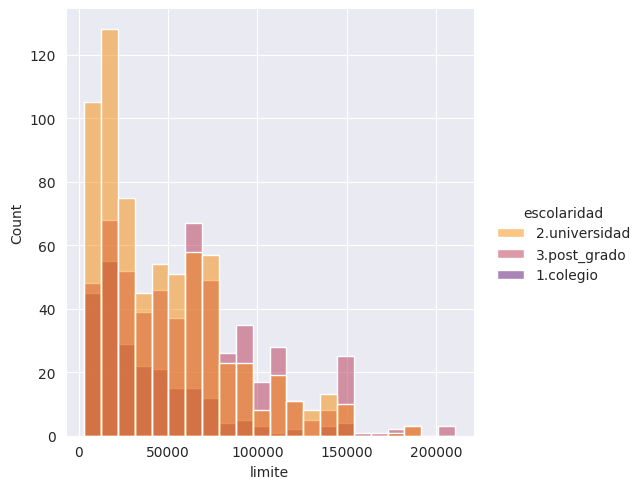

In [29]:
sns.displot(data=tarjetas, x='limite', hue='escolaridad', palette='inferno_r');

## Analisis de Variables categoricas

In [30]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,si,2.universidad,Casado,24,934.0122,0.0000,1,0.155100
1,36132,si,2.universidad,Soltero,26,519.3975,0.0000,1,0.014375
2,27099,si,2.universidad,Soltero,34,4223.5297,457.0698,0,0.155856
3,15055,si,2.universidad,Casado,37,14522.9563,602.2000,0,0.964660
4,150550,no,3.post_grado,Soltero,29,124060.1253,16560.5000,0,0.824046


<Axes: xlabel='cuenta_corriente', ylabel='count'>

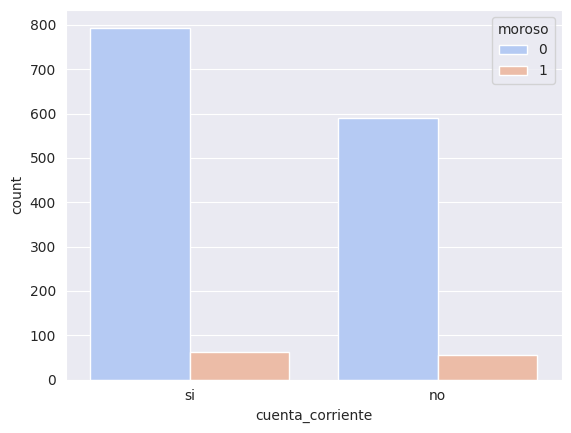

In [31]:
sns.countplot(x='cuenta_corriente', data=tarjetas, hue='moroso', palette='coolwarm')

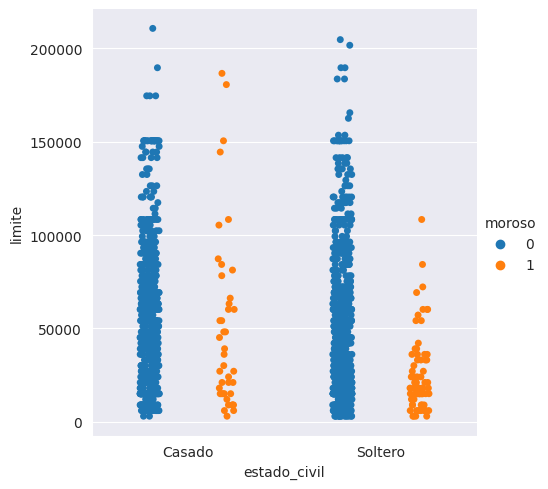

In [32]:
sns.catplot(x='estado_civil', y='limite', data=tarjetas, hue='moroso', dodge=True)
# dodge sirve para separar el dato categorico de morosidad

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='escolaridad', ylabel='iu'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


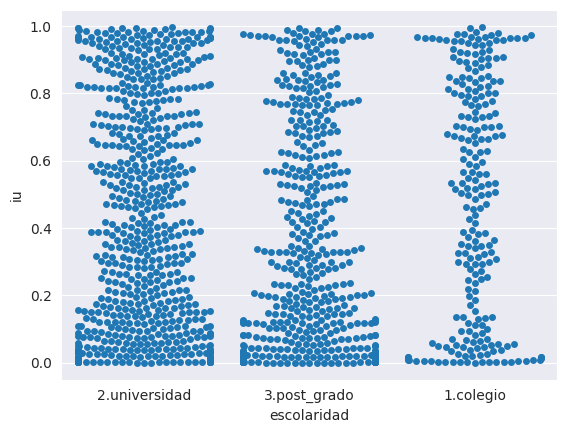

In [33]:
sns.swarmplot(x='escolaridad', y='iu', data=tarjetas)

<Axes: xlabel='escolaridad', ylabel='iu'>

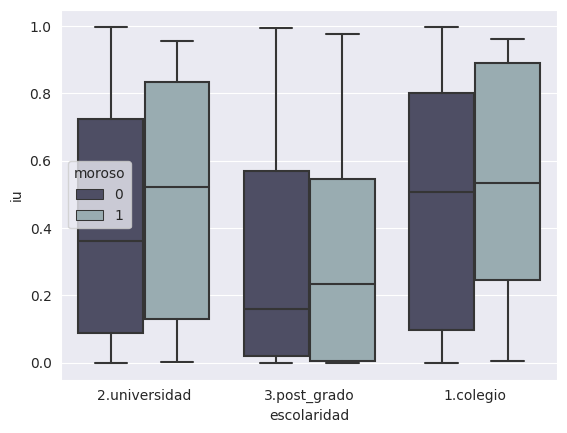

In [34]:
sns.boxplot(x='escolaridad', y='iu', data=tarjetas, hue='moroso', palette='bone')

<Axes: xlabel='escolaridad', ylabel='iu'>

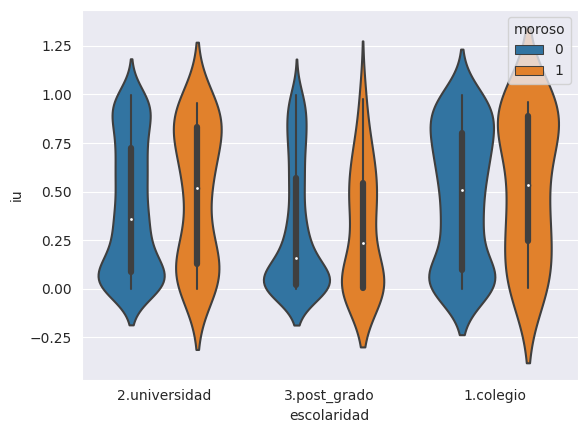

In [35]:
sns.violinplot(x='escolaridad', y='iu', data=tarjetas, hue='moroso')

In [36]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,si,2.universidad,Casado,24,934.0122,0.0000,1,0.155100
1,36132,si,2.universidad,Soltero,26,519.3975,0.0000,1,0.014375
2,27099,si,2.universidad,Soltero,34,4223.5297,457.0698,0,0.155856
3,15055,si,2.universidad,Casado,37,14522.9563,602.2000,0,0.964660
4,150550,no,3.post_grado,Soltero,29,124060.1253,16560.5000,0,0.824046


In [37]:
tarjetas.edad.unique()

array([24, 26, 34, 37, 29, 23, 28, 51, 41, 30, 49, 39, 40, 47, 27, 33, 32,
       54, 58, 22, 31, 25, 42, 45, 57, 56, 44, 35, 53, 43, 38, 63, 36, 52,
       46, 50, 48, 75, 55, 73, 59, 21, 60, 67, 61, 62, 70, 72])

In [38]:
bins=[20,30,40,50,100]
nombres={'20-30','30-40','40-50','50+'}
tarjetas['rango_edad']=pd.cut(tarjetas['edad'], bins, labels=nombres)

In [39]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,si,2.universidad,Casado,24,934.0122,0.0000,1,0.155100,50+
1,36132,si,2.universidad,Soltero,26,519.3975,0.0000,1,0.014375,50+
2,27099,si,2.universidad,Soltero,34,4223.5297,457.0698,0,0.155856,20-30
3,15055,si,2.universidad,Casado,37,14522.9563,602.2000,0,0.964660,20-30
4,150550,no,3.post_grado,Soltero,29,124060.1253,16560.5000,0,0.824046,50+


<Axes: xlabel='rango_edad', ylabel='limite'>

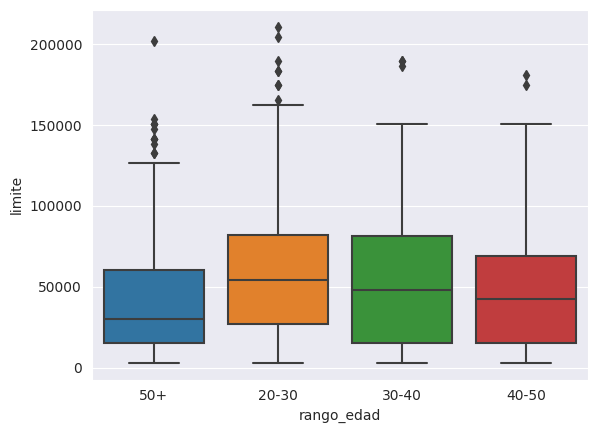

In [40]:
sns.boxplot(x='rango_edad', y='limite', data=tarjetas)

## Analisis de Variables Numericas

In [41]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,si,2.universidad,Casado,24,934.0122,0.0000,1,0.155100,50+
1,36132,si,2.universidad,Soltero,26,519.3975,0.0000,1,0.014375,50+
2,27099,si,2.universidad,Soltero,34,4223.5297,457.0698,0,0.155856,20-30
3,15055,si,2.universidad,Casado,37,14522.9563,602.2000,0,0.964660,20-30
4,150550,no,3.post_grado,Soltero,29,124060.1253,16560.5000,0,0.824046,50+


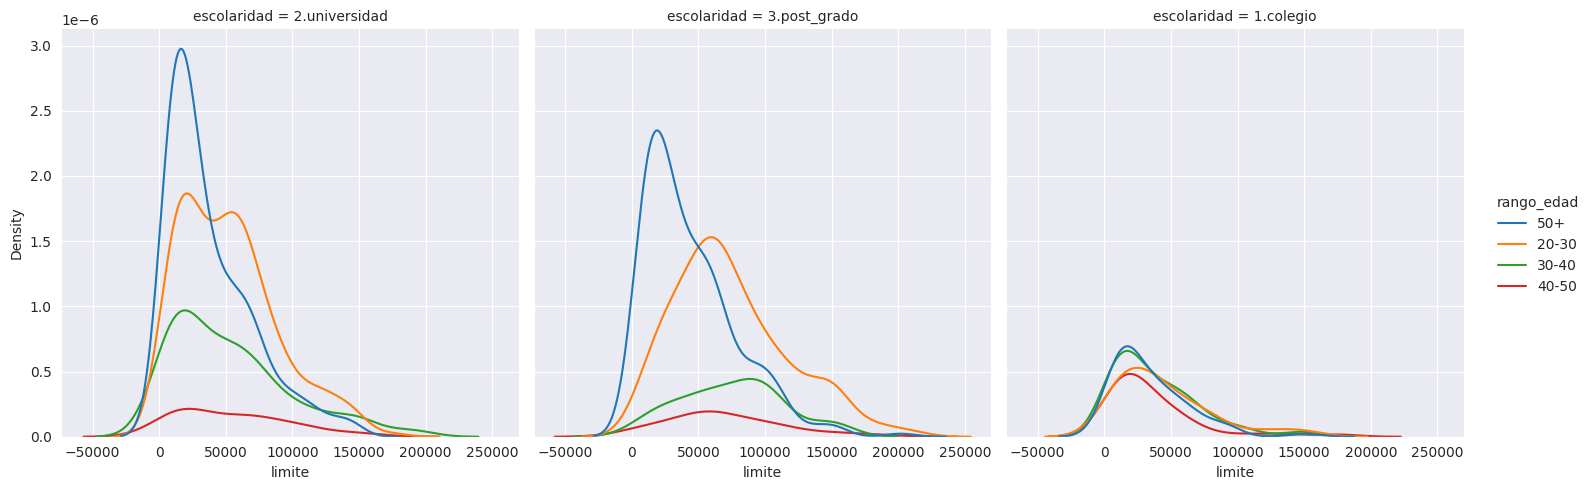

In [42]:
sns.displot(data=tarjetas, x='limite', col='escolaridad', kind='kde', hue='rango_edad');

## Dispersion

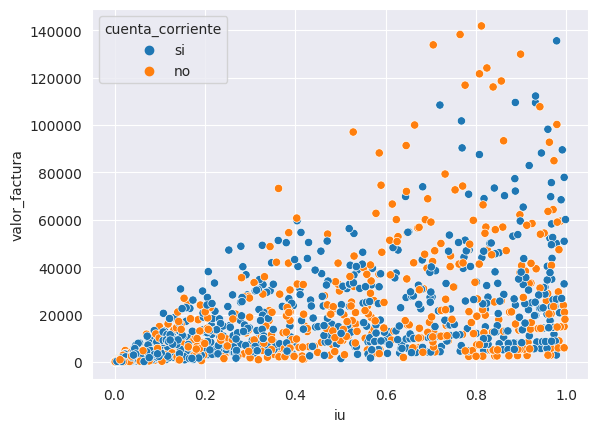

In [43]:
sns.scatterplot(x='iu', y='valor_factura', data=tarjetas, hue='cuenta_corriente');

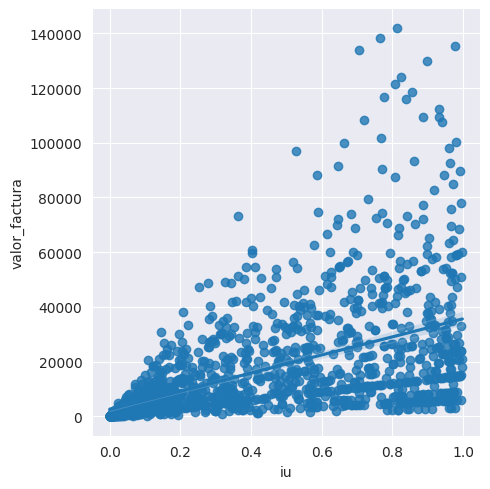

In [44]:
sns.lmplot(x='iu', y='valor_factura', data=tarjetas);

# Test de Hipotesis

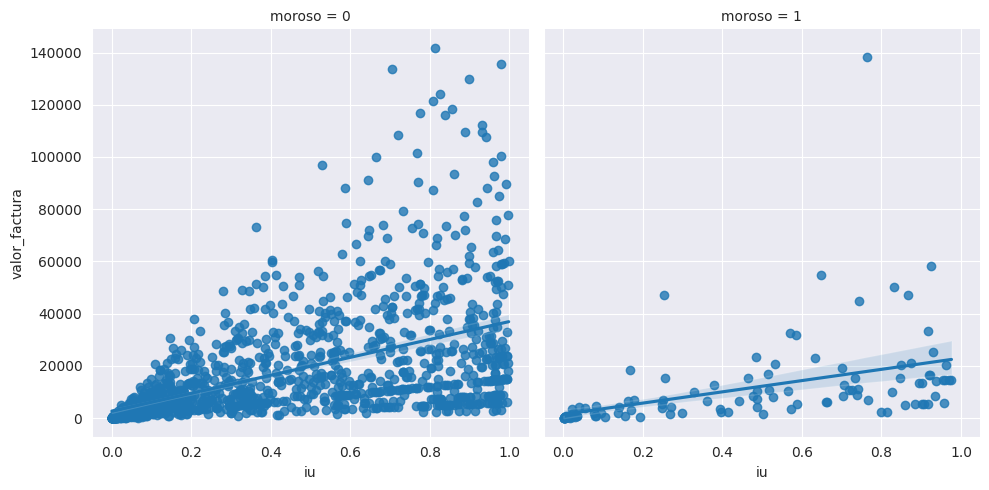

In [45]:
sns.lmplot(x='iu', y='valor_factura', data=tarjetas, col='moroso');

In [46]:
from scipy.stats import ranksums

H<sup>null<sup>
La distribucion de los grupos moroso y no moroso es la misma

H<sup>alt<sup>
La distribuccion de los grupos moroso y no moroso, no es la misma

In [47]:
moroso=tarjetas.query("moroso==1").valor_factura

In [48]:
moroso

0         934.0122
1         519.3975
38      10891.0881
45        330.6078
47       7316.7300
           ...    
1448     1619.0147
1472    17048.2820
1475     4402.0820
1478     1851.1628
1495      295.0780
Name: valor_factura, Length: 117, dtype: float64

In [49]:
no_moroso=tarjetas.query("moroso==0").valor_factura

In [50]:
no_moroso

2         4223.5297
3        14522.9563
4       124060.1253
5          114.4180
6         4244.3056
           ...     
1494     32698.2556
1496     23637.8555
1497       962.9178
1498       864.7592
1499     97022.8508
Name: valor_factura, Length: 1383, dtype: float64

In [51]:
resultado=ranksums(moroso, no_moroso)

In [52]:
print("El p_value de nuestro test es {}".format(resultado.pvalue))

El p_value de nuestro test es 0.010391243081223555


## Jointplot

In [53]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,si,2.universidad,Casado,24,934.0122,0.0000,1,0.155100,50+
1,36132,si,2.universidad,Soltero,26,519.3975,0.0000,1,0.014375,50+
2,27099,si,2.universidad,Soltero,34,4223.5297,457.0698,0,0.155856,20-30
3,15055,si,2.universidad,Casado,37,14522.9563,602.2000,0,0.964660,20-30
4,150550,no,3.post_grado,Soltero,29,124060.1253,16560.5000,0,0.824046,50+


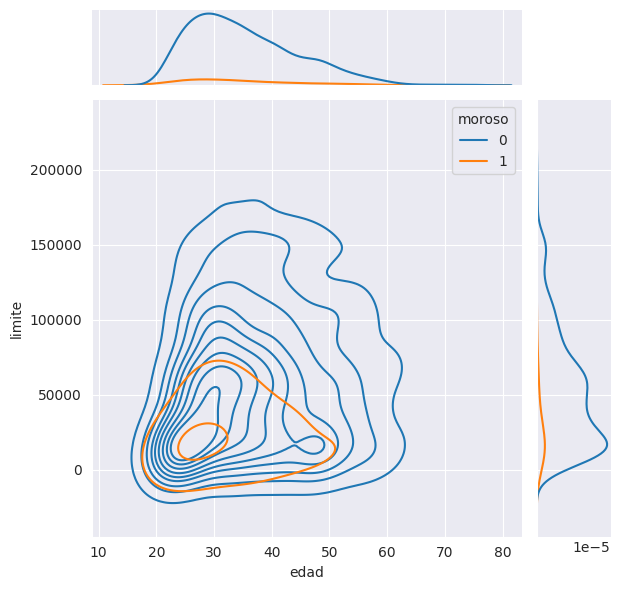

In [58]:
sns.jointplot(x='edad', y='limite', data=tarjetas, kind='kde', hue='moroso')  # kind (kde,hex)

## Pairplot

In [59]:
tarjetas.describe()

,limite,edad,valor_factura,valor_pago,moroso,iu
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51221.943333,35.212667,15459.869900,1984.869266,0.078000,0.388237
std,39424.407462,9.274955,20722.582831,5296.771686,0.268261,0.341923
min,3011.000000,21.000000,27.701200,0.000000,0.000000,0.000188
25%,18066.000000,28.000000,2035.586550,407.011925,0.000000,0.049209
50%,42154.000000,33.500000,7701.385250,759.374200,0.000000,0.308976
75%,72264.000000,41.000000,20671.568850,1705.279850,0.000000,0.704090
max,210770.000000,75.000000,141792.506500,97022.850800,1.000000,0.998010


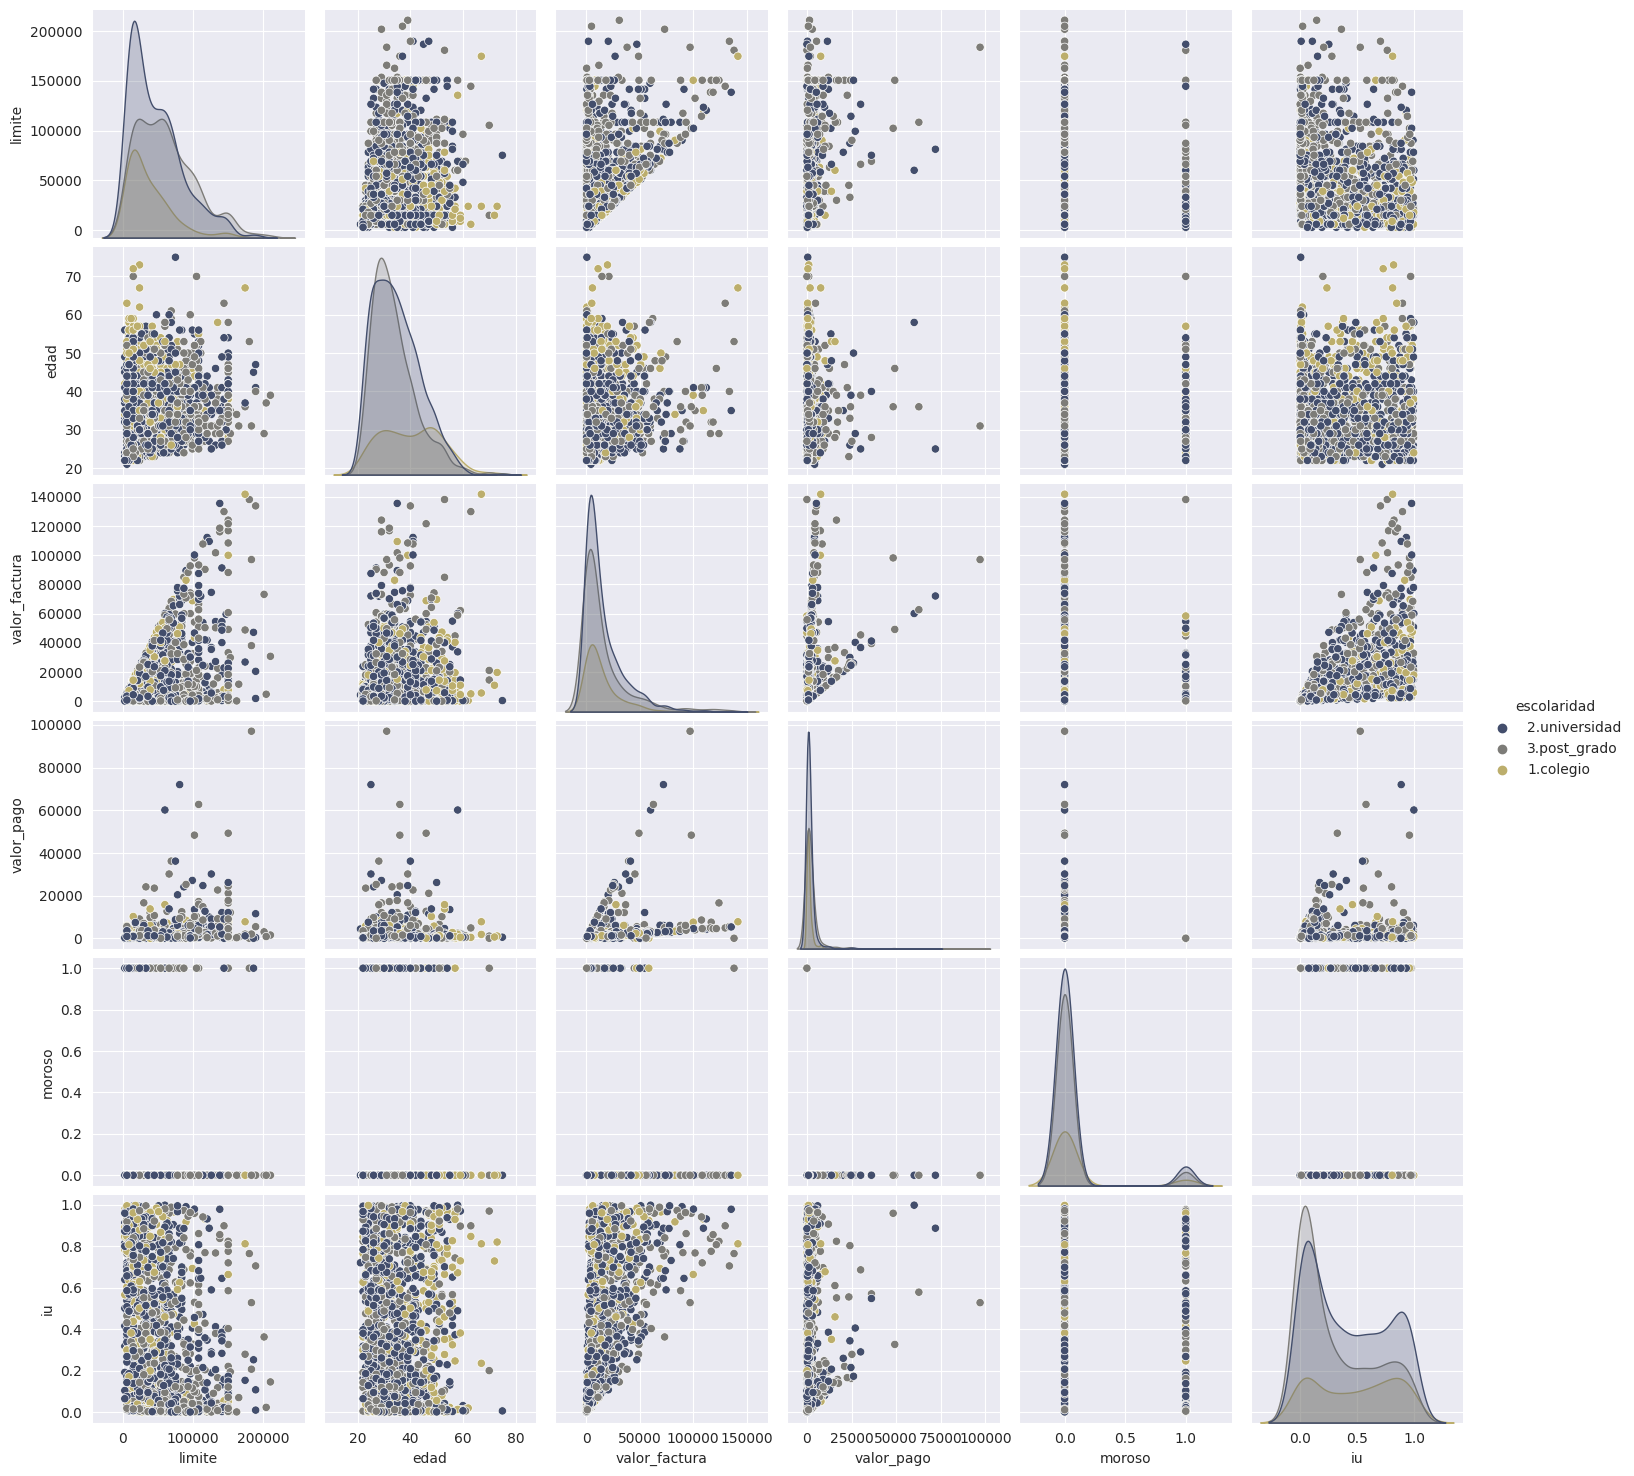

In [61]:
sns.pairplot(data=tarjetas, hue='escolaridad', palette='cividis')